# Import NLTK, TensorFlow, Keras Library

In [1]:
import re
import csv
import numpy as np
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

# Define Data Cleaning Function

In [2]:
def load_csv(filename):
    features = []
    labels = []
    count = 1
    blank_data_number_list = []
    with open(filename, 'r') as f:
        reader = csv.reader(f)
        for line in reader:
            # print(line[1:3])
            if line[1] == 'title':
                count += 1
                continue
            elif line[1] == ' ' or line[2] == ' ':
                blank_data_number_list.append(count)
                count += 1
                continue
            features.append(line[1:3])
            labels.append(line[3])
            count += 1
    print("Loaded csv file, and there are " + str(len(blank_data_number_list)) + " blank text have been removed "
                                                                                 "from dataset\n" + str(len(features)) +
          " data points in total")
    return features, labels

In [3]:
def remove_url(features):
    count = 0
    for i in features:
        if 'http://' in i[1] or 'https://' in i[1]:
            count += 1
            i[1] = re.sub(r'http\S+', ' ', i[1])
    print("There are "+str(count)+" url have been removed from text")

In [4]:
def remove_newline(features):
    for i in features:
        i[1] = i[1].replace('\n', ' ').replace('\r', ' ').replace('\n\n', ' ')
    print("Newline symbols have been removed from text")

In [5]:
def remove_number(features):
    for i in features:
        i[1] = re.sub(r'\d+', ' ', i[1])
    print("Numbers have been removed from text")

In [6]:
def remove_punctuation(features):
    for i in features:
        i[1] = re.sub('[^a-zA-Z]', ' ', i[1])
    print("Punctuations have been removed from text")

In [7]:
def convert_into_lowercase(features):
    for i in features:
        i[1] = i[1].lower()
    print("All text have been converted into lowercase")

In [8]:
def tokenization(features):
    for i in features:
        i[1] = word_tokenize(i[1])
    print("Preformed tokenization")

In [9]:
def remove_stopwords(features):
    stop_words = set(stopwords.words('english'))
    for i in features:
        i[1] = [words for words in i[1] if not words in stop_words]
    print("Stopwords have been removed")

In [10]:
def normalization(features):
    stemmer = PorterStemmer()
    lemma = WordNetLemmatizer()
    for i in features:
        i[1] = [stemmer.stem(word) for word in i[1]]
    for i in features:
        i[1] = [lemma.lemmatize(word=word, pos='v') for word in i[1]]
    print("Text has been normalized")

In [11]:
def remove_short_words(features):
    for i in features:
        i[1] = [word for word in i[1] if len(word) > 2]
    print("Short words have been removed")

# Clean Data

In [12]:
features_data, labels_data = load_csv("./news.csv")

Loaded csv file, and there are 36 blank text have been removed from dataset
6299 data points in total


In [13]:
remove_url(features_data)

There are 295 url have been removed from text


In [14]:
remove_newline(features_data)

Newline symbols have been removed from text


In [15]:
remove_number(features_data)

Numbers have been removed from text


In [16]:
remove_punctuation(features_data)

Punctuations have been removed from text


In [17]:
convert_into_lowercase(features_data)

All text have been converted into lowercase


In [18]:
tokenization(features_data)

Preformed tokenization


In [19]:
remove_stopwords(features_data)

Stopwords have been removed


In [20]:
normalization(features_data)

Text has been normalized


In [21]:
remove_short_words(features_data)

Short words have been removed


# Drop News Tittle

In [22]:
def extract_text(features_data):
    extracted = []
    for i in features_data:
        extracted.append(i[1])
    return extracted

In [23]:
features_data = extract_text(features_data)

# Word2Vec

In [24]:
import gensim

In [25]:
#Dimension of vectors we are generating
EMBEDDING_DIM = 100

#Creating Word Vectors by Word2Vec Method
w2v_model = gensim.models.Word2Vec(sentences=features_data, size=EMBEDDING_DIM, window=5, min_count=1)

In [26]:
len(w2v_model.wv.vocab)

42551

In [27]:
w2v_model["say"]

/Users/zhaosiqi/.conda/envs/pythonProject1/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


array([ 4.39992994e-01,  5.50618721e-03,  8.79078567e-01,  1.40246987e+00,
       -3.49762142e-01, -2.33372480e-01, -3.00124556e-01,  1.27946293e+00,
        1.06896675e+00, -5.22127096e-03,  2.36849025e-01, -3.66457009e+00,
       -1.11039209e+00, -2.80872613e-01,  6.50587678e-01, -1.98138714e-01,
        5.99166341e-02, -4.01443750e-01, -6.91692114e-01,  8.82939100e-01,
        1.09929895e+00, -1.86785683e-01, -7.29182482e-01, -6.98627606e-02,
        1.82557344e-01,  9.33465660e-01, -1.05538213e+00, -2.43873224e-01,
        2.81094581e-01,  1.73928487e+00,  4.72934060e-02, -8.25273991e-02,
        4.65616763e-01,  1.03177726e+00, -2.97019422e-01,  1.63644738e-02,
        1.82274848e-01, -8.57055247e-01, -1.12198555e+00,  5.51674366e-01,
       -8.36056888e-01, -5.25856912e-01,  1.34128064e-01,  1.05803758e-01,
       -7.36937374e-02,  2.79062897e-01,  1.70134902e+00, -1.55509090e+00,
       -1.95021808e+00, -5.39728880e-01, -1.70033261e-01, -7.97155321e-01,
        1.12898624e+00,  

In [28]:
w2v_model.wv.most_similar("say")

[('tell', 0.6692366600036621),
 ('ask', 0.5896276235580444),
 ('agre', 0.5827974081039429),
 ('respond', 0.5325295925140381),
 ('believ', 0.5156740546226501),
 ('speak', 0.5016465187072754),
 ('insist', 0.4966651201248169),
 ('acknowledg', 0.48986852169036865),
 ('suggest', 0.48980599641799927),
 ('admit', 0.48370590806007385)]

In [29]:
w2v_model.wv.most_similar("good")

[('bad', 0.8332777619361877),
 ('terribl', 0.675784707069397),
 ('happi', 0.6739716529846191),
 ('better', 0.6647763252258301),
 ('hurt', 0.6627670526504517),
 ('unobtain', 0.6375031471252441),
 ('faustian', 0.6356115937232971),
 ('obvious', 0.6322229504585266),
 ('mayb', 0.621401309967041),
 ('nautil', 0.6210019588470459)]

In [30]:
# Function to create weight matrix from word2vec gensim model
def get_weight_matrix(model, vocab):
    # total vocabulary size plus 0 for unknown words
    vocab_size = len(vocab) + 1
    # define weight matrix dimensions with all 0
    weight_matrix = np.zeros((vocab_size, EMBEDDING_DIM))
    # step vocab, store vectors using the Tokenizer's integer mapping
    for word, i in vocab.items():
        weight_matrix[i] = model[word]
    return weight_matrix

# Unique Numbers Vectorize

In [31]:
def vectorize(extracted):
    tokenizer = Tokenizer()
    tokenizer.fit_on_texts(extracted)
    extracted = tokenizer.texts_to_sequences(extracted)
    return extracted, tokenizer

In [32]:
features_data, tokenizer = vectorize(features_data)

In [33]:
embedding_vectors = get_weight_matrix(w2v_model, tokenizer.word_index)

/Users/zhaosiqi/.conda/envs/pythonProject1/lib/python3.7/site-packages/ipykernel_launcher.py:9: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  if __name__ == '__main__':


# Padding

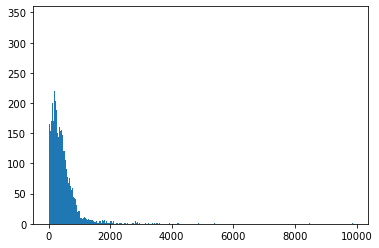

In [34]:
import matplotlib.pyplot as plt
plt.hist([len(x) for x in features_data], bins=500)
plt.show()

In [35]:
nos = np.array([len(x) for x in features_data])
len(nos[nos  < 1000])

5921

In [36]:
maxlen = 1000
features_data = pad_sequences(features_data, maxlen=maxlen)

# Encode Labels & Split data

In [37]:
def encode_labels(labels):
    labels = np.array(labels)
    labels = LabelEncoder().fit_transform(labels)
    return labels

In [38]:
labels_data = encode_labels(labels_data)

In [39]:
def split_data(features, labels, test_proportion):
    index = int(len(features) * (1 - test_proportion))
    train_x, train_y = np.array(features[:index],dtype=object), np.array(labels[:index],dtype=object)
    test_x, test_y = np.array(features[index:],dtype=object), np.array(labels[index:],dtype=object)
    return (train_x, train_y), (test_x, test_y)

In [40]:
(x_train, y_train), (x_test, y_test) = split_data(features_data, labels_data, 0.1)

In [41]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(5669, 1000)
(5669,)
(630, 1000)
(630,)


# Training Deep Learning Models

In [42]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, MaxPool1D, Conv1D
from keras.layers.embeddings import Embedding
from keras.layers import BatchNormalization
import tensorflow as tf
from keras.layers import LSTM
from keras.layers import Bidirectional

Using TensorFlow backend.


In [43]:
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)

### LSTM

In [44]:
vocab_size = len(tokenizer.word_index) + 1

In [45]:
#Defining Neural Network
model = Sequential()
#Non-trainable embeddidng layer
model.add(Embedding(vocab_size, output_dim=EMBEDDING_DIM, weights=[embedding_vectors], input_length=maxlen, trainable=False))
#LSTM 
model.add(LSTM(units=128))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
model.summary()
model.compile(loss='binary_crossentropy', optimizer="adam", metrics=['accuracy'])
model.fit(x_train, y_train, validation_split=0.2, epochs=6, callbacks=[early_stop])

2021-12-11 15:54:49.873337: I tensorflow/core/platform/cpu_feature_guard.cc:145] This TensorFlow binary is optimized with Intel(R) MKL-DNN to use the following CPU instructions in performance critical operations:  SSE4.1 SSE4.2
To enable them in non-MKL-DNN operations, rebuild TensorFlow with the appropriate compiler flags.
2021-12-11 15:54:49.873832: I tensorflow/core/common_runtime/process_util.cc:115] Creating new thread pool with default inter op setting: 8. Tune using inter_op_parallelism_threads for best performance.


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 1000, 100)         4255200   
_________________________________________________________________
lstm_1 (LSTM)                (None, 128)               117248    
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 129       
Total params: 4,372,577
Trainable params: 117,377
Non-trainable params: 4,255,200
_________________________________________________________________
Train on 4535 samples, validate on 1134 samples
Epoch 1/6
4535/4535 [==============================] - 445s 98ms/step - loss: 0.5422 - accuracy: 0.7336 - val_loss: 0.5505 - val_accuracy: 0.7178
Epoch 2/6
4535/4535 [==============================] - 473s 104ms/step - loss: 0.4344 - accuracy: 0.7971 - val_loss: 0.4980 - val_accuracy: 0.7716
Epoch 3/6
4535/4535 [======

In [46]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print('\nTest accuracy:', test_acc)


Test accuracy: 0.8698412775993347


In [47]:
predict = model.predict(x_train[0:1])
float(predict)

0.04953572154045105

### MLP

In [48]:
model2 = Sequential()
model2.add(Embedding(vocab_size, output_dim=EMBEDDING_DIM, weights=[embedding_vectors], input_length=maxlen, trainable=False))
model2.add(Dropout(0.2))
model2.add(Flatten())
model2.add(Dense(512, activation="relu"))
model2.add(Dropout(0.25))
model2.add(Dense(1, activation="sigmoid"))
model2.summary()
model2.compile(loss='binary_crossentropy', optimizer="adam", metrics=['accuracy'])
history = model2.fit(x_train, y_train, validation_split=0.2, epochs=6, callbacks=[early_stop])

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 1000, 100)         4255200   
_________________________________________________________________
dropout_1 (Dropout)          (None, 1000, 100)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 100000)            0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               51200512  
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 513       
Total params: 55,456,225
Trainable params: 51,201,025
Non-trainable params: 4,255,200
__________________________________

In [49]:
test_loss, test_acc = model2.evaluate(x_test, y_test, verbose=2)
print('\nTest accuracy:', test_acc)


Test accuracy: 0.8809523582458496


### CNN

In [50]:
model3 = Sequential()

model3.add(Embedding(vocab_size, output_dim=EMBEDDING_DIM, weights=[embedding_vectors], input_length=maxlen, trainable=False))
model3.add(Conv1D(256, 3, padding='same', activation='relu'))
model3.add(MaxPool1D(3, 3, padding='same'))
model3.add(Conv1D(32, 3, padding='same', activation='relu'))
model3.add(Flatten())
model3.add(Dropout(0.3))
model3.add(BatchNormalization())
model3.add(Dense(256, activation='relu'))
model3.add(Dropout(0.2))
model3.add(Dense(units=1, activation='sigmoid'))

model3.summary()
model3.compile(loss='binary_crossentropy', optimizer="adam", metrics=['accuracy'])
history = model3.fit(x_train, y_train, validation_split=0.2, epochs=6, callbacks=[early_stop])

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 1000, 100)         4255200   
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 1000, 256)         77056     
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 334, 256)          0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 334, 32)           24608     
_________________________________________________________________
flatten_2 (Flatten)          (None, 10688)             0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 10688)             0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 10688)            

In [51]:
test_loss, test_acc = model3.evaluate(x_test, y_test, verbose=2)
print('\nTest accuracy:', test_acc)


Test accuracy: 0.8095238208770752


# Cross Validation

In [52]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=3)
kf

KFold(n_splits=3, random_state=None, shuffle=False)

In [55]:
L = []
for train_index, test_index in kf.split(features_data, labels_data):
    x_train, x_test, y_train, y_test = features_data[train_index], features_data[test_index], labels_data[train_index], labels_data[test_index]
    
    model4 = Sequential()

    model4.add(Embedding(vocab_size, output_dim=EMBEDDING_DIM, weights=[embedding_vectors], input_length=maxlen, trainable=False))
    model4.add(Conv1D(256, 3, padding='same', activation='relu'))
    model4.add(MaxPool1D(3, 3, padding='same'))
    model4.add(Conv1D(32, 3, padding='same', activation='relu'))
    model4.add(Flatten())
    model4.add(Dropout(0.3))
    model4.add(BatchNormalization())
    model4.add(Dense(256, activation='relu'))
    model4.add(Dropout(0.2))
    model4.add(Dense(units=1, activation='sigmoid'))
    
    model4.compile(loss='binary_crossentropy', optimizer="adam", metrics=['accuracy'])
    
    model4.fit(x_train, y_train, epochs=6, callbacks=[early_stop], validation_split=0.2)
    
    test_loss, test_acc = model4.evaluate(x_test, y_test, verbose=2)
    
    L.append(test_acc)  
    
print(L)
    

Train on 3359 samples, validate on 840 samples
Epoch 1/6
3359/3359 [==============================] - 77s 23ms/step - loss: 0.5452 - accuracy: 0.7797 - val_loss: 0.4047 - val_accuracy: 0.8405
Epoch 2/6
3359/3359 [==============================] - 76s 23ms/step - loss: 0.3134 - accuracy: 0.8684 - val_loss: 2.0377 - val_accuracy: 0.6321
Epoch 3/6
3359/3359 [==============================] - 75s 22ms/step - loss: 0.2843 - accuracy: 0.8872 - val_loss: 0.4297 - val_accuracy: 0.8631
Train on 3359 samples, validate on 840 samples
Epoch 1/6
3359/3359 [==============================] - 78s 23ms/step - loss: 0.5659 - accuracy: 0.7597 - val_loss: 0.4618 - val_accuracy: 0.8369
Epoch 2/6
3359/3359 [==============================] - 76s 22ms/step - loss: 0.3335 - accuracy: 0.8634 - val_loss: 0.8504 - val_accuracy: 0.7917
Epoch 3/6
3359/3359 [==============================] - 76s 23ms/step - loss: 0.3465 - accuracy: 0.8634 - val_loss: 0.4956 - val_accuracy: 0.8048
Train on 3360 samples, validate on 8

# Save Model

In [ ]:
model.save('model_LSTM_text.h5')